# Image segmentation using Expectation-Maximization

## Prerequisites

- NumPy
- Matplotlib
- SciPy

In [3]:
%cd ./pic segmentation

D:\codes\jupyter_prj\pic segmentation


In [1]:
from matplotlib.image import imread
import cv2
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from EM import EM
from extractFeature import *

## Read Image and resize

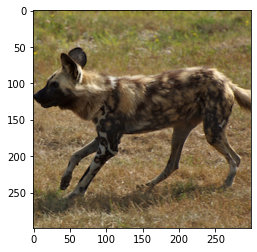

In [8]:
file = 'images/test_image.png'
img = cv2.imread(file)
x,y = img.shape[:-1]
if y > 500:
    x = int(500 * x / y)
    y = 500
img = cv2.resize(img, (y, x), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Preprocess: Smoothing Image and Extract Features

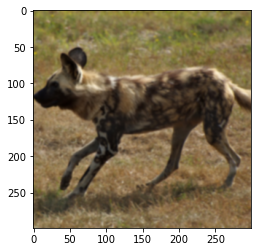

In [9]:
sigma = 1
filtered_img = gaussian_filter(img, sigma=(sigma, sigma,0))
plt.imshow(filtered_img)
lab_img = cv2.cvtColor(filtered_img, cv2.COLOR_RGB2LAB)

# Wenjuan's Part: find the optimal value of weight

feature = norm_and_extract_features(lab_img,rgb_weight=0.6)
color_label_table = np.array([[255,165,0], [144,238,144], [28,134,238], [255,255,255], [255,0,255]])


## Expectation-Maximization with Gaussian Mixture Model

previous_likelihood_sum: 870533.388332
5 iter	 time:0.2	 change:8.60
10 iter	 time:0.4	 change:0.97
15 iter	 time:0.5	 change:1.20
20 iter	 time:0.6	 change:2.01
25 iter	 time:0.8	 change:4.79


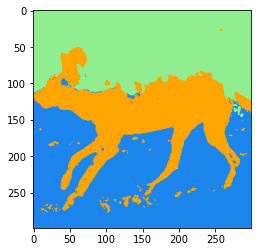

In [23]:
# from EM import EM
# feature = img.reshape(-1,3)
k = 3
em = EM(k=k, verbose=True, threshold=0.01)
res = em.fit(feature)
clustered_img = color_label_table[res].reshape(img.shape)
plt.imshow(clustered_img)

## Test using kmeans cluster

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

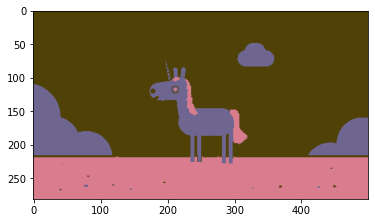

In [7]:
from cluster import kMeanCluster
kmc = kMeanCluster(k)
res = kmc.fit(feature).predict(feature)
clustered_img = color_label_table[res].reshape(img.shape)
plt.imshow(clustered_img)
kmc.label_

## Test using sklearn GMM

In [ ]:
from sklearn.mixture import GaussianMixture
gs = GaussianMixture(n_components=k, random_state=42, verbose=2).fit(feature)
# model.predict predicts the index of aligned component for each pixel
r_pred = gs.predict(feature)
# model.means_ is the mean of the components
pic = color_label_table[r_pred]
pic = pic.reshape(img.shape)
plt.imshow(pic)